In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import desired packages
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
tf.__version__

'2.2.0'

In [4]:
#import data 
data=pd.read_csv('/content/drive/My Drive/iris.data', names=['f1','f2','f3','f4','f5'])

In [5]:
data

,f1,f2,f3,f4,f5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data["f5"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: f5, dtype: int64

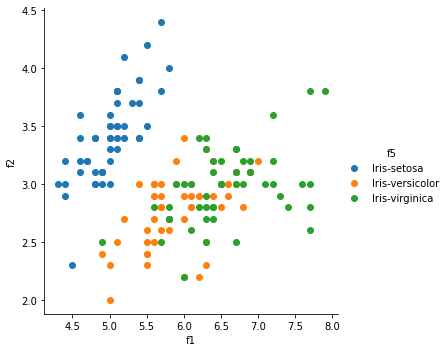

In [7]:
sns.FacetGrid(data, hue="f5", height=5) \
   .map(plt.scatter, "f1", "f2") \
   .add_legend()

In [8]:
#map data into arrays
s=np.asarray([1,0,0])
ve=np.asarray([0,1,0])
vi=np.asarray([0,0,1])
data['f5'] = data['f5'].map({'Iris-setosa': s, 'Iris-versicolor': ve,'Iris-virginica':vi})

In [9]:
data

,f1,f2,f3,f4,f5
0,5.1,3.5,1.4,0.2,"[1, 0, 0]"
1,4.9,3.0,1.4,0.2,"[1, 0, 0]"
2,4.7,3.2,1.3,0.2,"[1, 0, 0]"
3,4.6,3.1,1.5,0.2,"[1, 0, 0]"
4,5.0,3.6,1.4,0.2,"[1, 0, 0]"
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,"[0, 0, 1]"
146,6.3,2.5,5.0,1.9,"[0, 0, 1]"
147,6.5,3.0,5.2,2.0,"[0, 0, 1]"
148,6.2,3.4,5.4,2.3,"[0, 0, 1]"


In [10]:
#shuffle the data
data=data.iloc[np.random.permutation(len(data))]

In [11]:
data

,f1,f2,f3,f4,f5
56,6.3,3.3,4.7,1.6,"[0, 1, 0]"
70,5.9,3.2,4.8,1.8,"[0, 1, 0]"
50,7.0,3.2,4.7,1.4,"[0, 1, 0]"
22,4.6,3.6,1.0,0.2,"[1, 0, 0]"
102,7.1,3.0,5.9,2.1,"[0, 0, 1]"
...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,"[0, 0, 1]"
61,5.9,3.0,4.2,1.5,"[0, 1, 0]"
141,6.9,3.1,5.1,2.3,"[0, 0, 1]"
9,4.9,3.1,1.5,0.1,"[1, 0, 0]"


In [12]:
data=data.reset_index(drop=True)
data

,f1,f2,f3,f4,f5
0,6.3,3.3,4.7,1.6,"[0, 1, 0]"
1,5.9,3.2,4.8,1.8,"[0, 1, 0]"
2,7.0,3.2,4.7,1.4,"[0, 1, 0]"
3,4.6,3.6,1.0,0.2,"[1, 0, 0]"
4,7.1,3.0,5.9,2.1,"[0, 0, 1]"
...,...,...,...,...,...
145,6.4,3.2,5.3,2.3,"[0, 0, 1]"
146,5.9,3.0,4.2,1.5,"[0, 1, 0]"
147,6.9,3.1,5.1,2.3,"[0, 0, 1]"
148,4.9,3.1,1.5,0.1,"[1, 0, 0]"


In [13]:
#training data
x_input=data.loc[0:105,['f1','f2','f3','f4']]
temp=data['f5']
y_input=temp[0:106]
#test data
x_test=data.loc[106:149,['f1','f2','f3','f4']]
y_test=temp[106:150]

In [14]:
#placeholders and variables. input has 4 features and output has 3 classes
tf.disable_v2_behavior()
x=tf.placeholder(tf.float32,shape=[None,4])
y_=tf.placeholder(tf.float32,shape=[None, 3])
#weight and bias
W=tf.Variable(tf.zeros([4,3]))
b=tf.Variable(tf.zeros([3]))

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# model 
#softmax function for multiclass classification
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [16]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [17]:
#optimiser -
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
#session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.initialize_all_variables()
sess.run(init)
#number of interations
epoch=2000

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [19]:
for step in range(epoch):
   _, c=sess.run([train_step,cross_entropy], feed_dict={x: x_input, y_:[t for t in y_input.to_numpy()]})
   if step%500==0 :
       print (c)

1.0986122
0.1586366
0.10004352
0.080073446


In [20]:
#random testing at Sn.130
a=data.loc[135,['f1','f2','f3','f4']]
b=a.values.reshape(1,4)
largest = sess.run(tf.arg_max(y,1), feed_dict={x: b})[0]
if largest==0:
    print("flower is :Iris-setosa")
elif largest==1:
    print("flower is :Iris-versicolor")
else :
    print("flower is :Iris-virginica")

flower is :Iris-versicolor


In [21]:
print(sess.run(accuracy,feed_dict={x: x_test, y_:[t for t in y_test.to_numpy()]}))

1.0
